<a href="https://colab.research.google.com/github/nelmalfernando/Nelmal_INSE_6220_Project/blob/main/INSE_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 41.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates fr

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nelmalfernando/Nelmal_INSE_6220_Project/main/abalone.csv')

# Remove rows with null values
df = df.dropna()

df.head(25)

Class  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
5      I   0.425     0.300   0.095        0.3515          0.1410   
6      F   0.530     0.415   0.150        0.7775          0.2370   
7      F   0.545     0.425   0.125        0.7680          0.2940   
8      M   0.475     0.370   0.125        0.5095          0.2165   
9      F   0.550     0.440   0.150        0.8945          0.3145   
10     F   0.525     0.380   0.140        0.6065          0.1940   
11     M   0.430     0.350   0.110        0.4060          0.1675   
12     M   0.490     0.380   0.135        0.5415          0.2175   
13     F   0.535     0.405   0.145        0.6845          0.2725   
14     F   0.470     0.355   0.100        0.4755          0.1675   
15     M   0.500     0.400   0.130        0.6645          0.2580   
16     I   0.355     0.280   0.085        0.2905          0.0950   
17     F   0.440     0.340   0.100        0.4510          0.1880   
18     M   0.365     0.295   0.080        0.2555          0.0970   
19     M   0.450     0.320   0.100        0.3810          0.1705   
20     M   0.355     0.280   0.095        0.2455          0.0955   
21     I   0.380     0.275   0.100        0.2255          0.0800   
22     F   0.565     0.440   0.155        0.9395          0.4275   
23     F   0.550     0.415   0.135        0.7635          0.3180   
24     F   0.615     0.480   0.165        1.1615          0.5130   

    Viscera weight  Shell weight  Rings  
0           0.1010         0.150     15  
1           0.0485         0.070      7  
2           0.1415         0.210      9  
3           0.1140         0.155     10  
4           0.0395         0.055      7  
5           0.0775         0.120      8  
6           0.1415         0.330     20  
7           0.1495         0.260     16  
8           0.1125         0.165      9  
9           0.1510         0.320     19  
10          0.1475         0.210     14  
11          0.0810         0.135     10  
12          0.0950         0.190     11  
13          0.1710         0.205     10  
14          0.0805         0.185     10  
15          0.1330         0.240     12  
16          0.0395         0.115      7  
17          0.0870         0.130     10  
18          0.0430         0.100      7  
19          0.0750         0.115      9  
20          0.0620         0.075     11  
21          0.0490         0.085     10  
22          0.2140         0.270     12  
23          0.2100         0.200      9  
24          0.3010         0.305     10

In [6]:
len(df.index)

4177

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

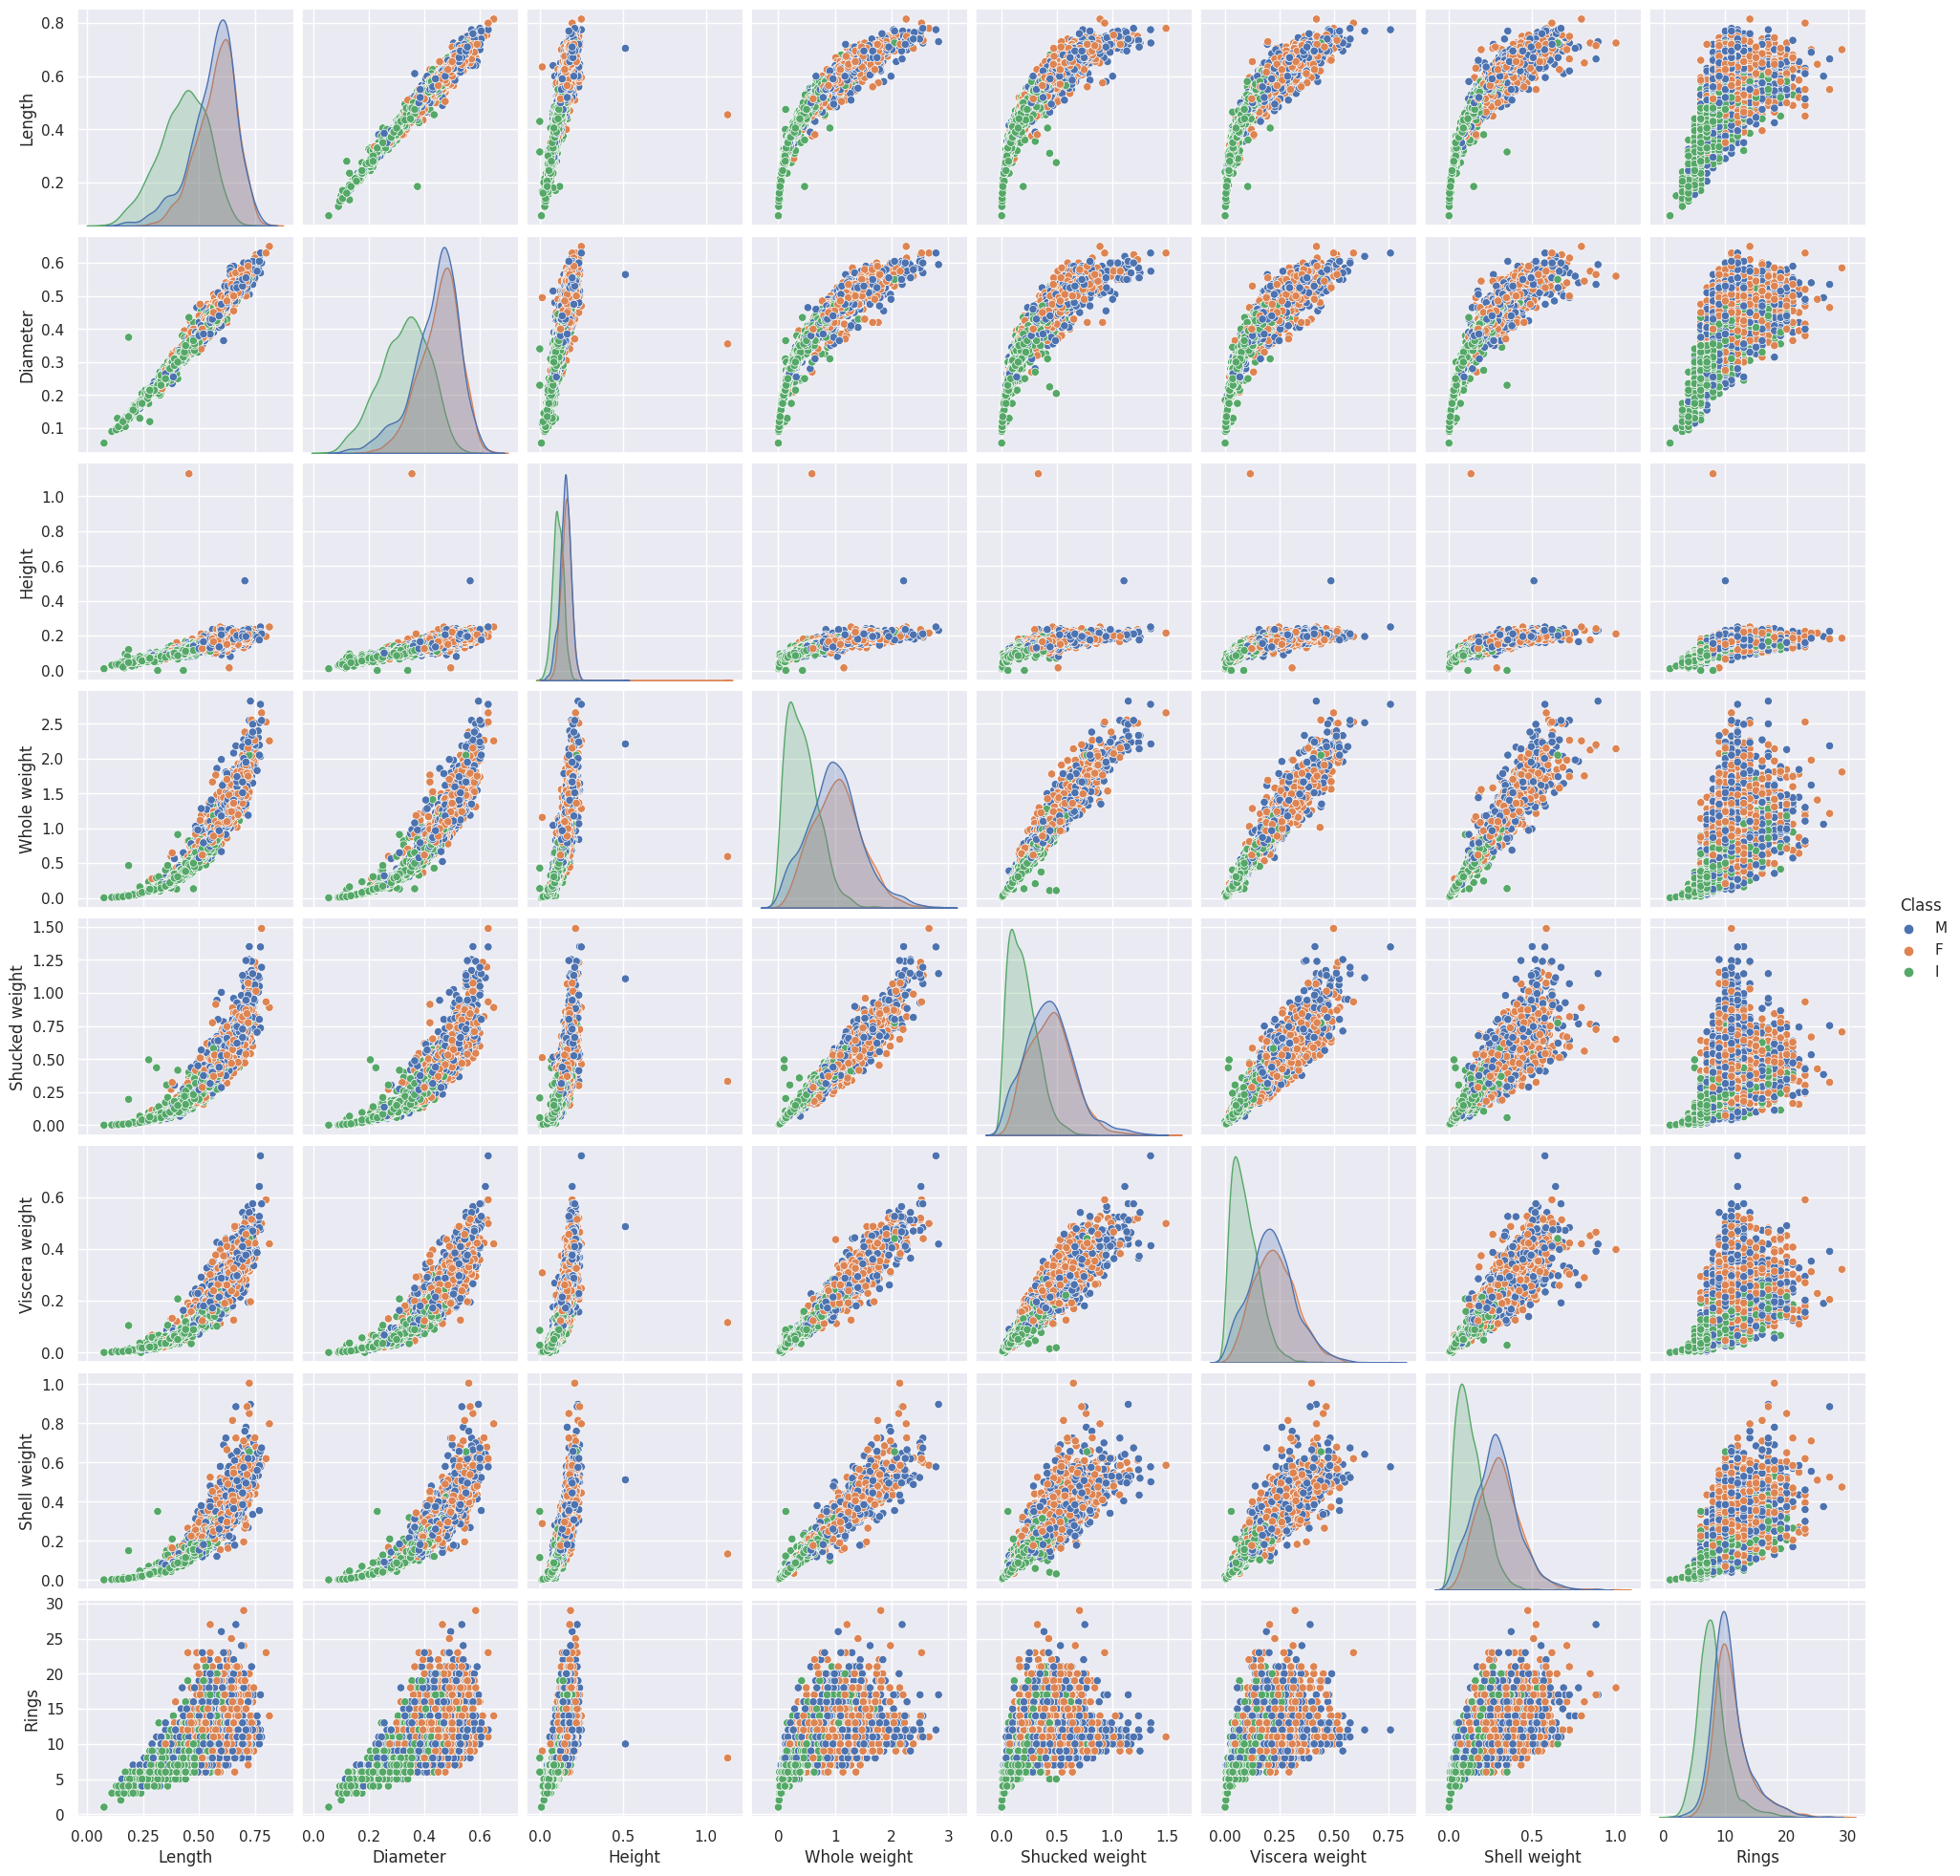

In [11]:
sns.pairplot(df, hue='Class')
plt.show()

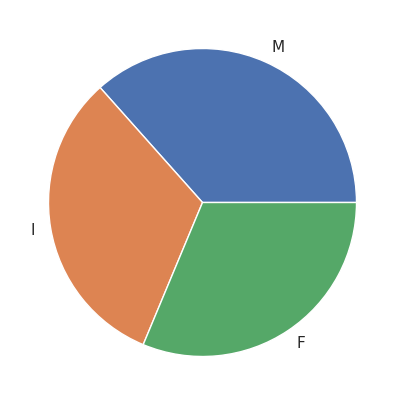

In [12]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [13]:
X = df.drop(columns=['Class'])
X.head(10)

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
5         0.120      8  
6         0.330     20  
7         0.260     16  
8         0.165      9  
9         0.320     19

In [14]:
X.describe().transpose()

count      mean       std     min     25%     50%     75%  \
Length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   
Diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   
Height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   
Whole weight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   
Shucked weight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   
Viscera weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   
Shell weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   
Rings           4177.0  9.933684  3.224169  1.0000  8.0000  9.0000  11.000   

                    max  
Length           0.8150  
Diameter         0.6500  
Height           1.1300  
Whole weight     2.8255  
Shucked weight   1.4880  
Viscera weight   0.7600  
Shell weight     1.0050  
Rings           29.0000

**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685       -0.726212   
1 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910       -1.205221   
2  0.050033  0.122130 -0.107991     -0.309469       -0.463500       -0.356690   
3 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238       -0.607600   
4 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968       -1.287337   
5 -0.824395 -1.087206 -1.064424     -0.973307       -0.983919       -0.940625   
6  0.050033  0.071741  0.250672     -0.104505       -0.551363       -0.356690   
7  0.174951  0.172519 -0.347099     -0.123880       -0.294533       -0.283698   
8 -0.408000 -0.381760 -0.347099     -0.651076       -0.643732       -0.621286   
9  0.216591  0.323686  0.250672      0.134109       -0.202164       -0.270012   

   Shell weight     Rings  
0     -0.638217  1.571544  
1     -1.212987 -0.910013  
2     -0.207139 -0.289624  
3     -0.602294  0.020571  
4     -1.320757 -0.910013  
5     -0.853756 -0.599818  
6      0.655017  3.122516  
7      0.152092  1.881738  
8     -0.530447 -0.289624  
9      0.583170  2.812322

In [16]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
Length          4177.0 -5.834718e-16  1.00012 -3.739154 -0.616198  0.174951   
Diameter        4177.0 -3.027929e-16  1.00012 -3.556267 -0.583316  0.172519   
Height          4177.0  3.912493e-16  1.00012 -3.335953 -0.586208  0.011563   
Whole weight    4177.0  9.185853e-17  1.00012 -1.686092 -0.789758 -0.059638   
Shucked weight  4177.0 -1.020650e-17  1.00012 -1.614731 -0.781159 -0.105289   
Viscera weight  4177.0  2.704723e-16  1.00012 -1.643173 -0.794642 -0.087532   
Shell weight    4177.0  2.976897e-16  1.00012 -1.705134 -0.781909 -0.034708   
Rings           4177.0  8.505419e-17  1.00012 -2.771180 -0.599818 -0.289624   

                     75%        max  
Length          0.757903   2.423480  
Diameter        0.726798   2.440025  
Height          0.609334  23.683287  
Whole weight    0.661305   4.072271  
Shucked weight  0.642673   5.085388  
Viscera weight  0.660635   5.286500  
Shell weight    0.647832   5.504642  
Rings           0.330765   5.914268

**Observations and variables**

In [18]:
observations = list(X.index)
variables = list(X.columns)

**Box and Whisker Plots**

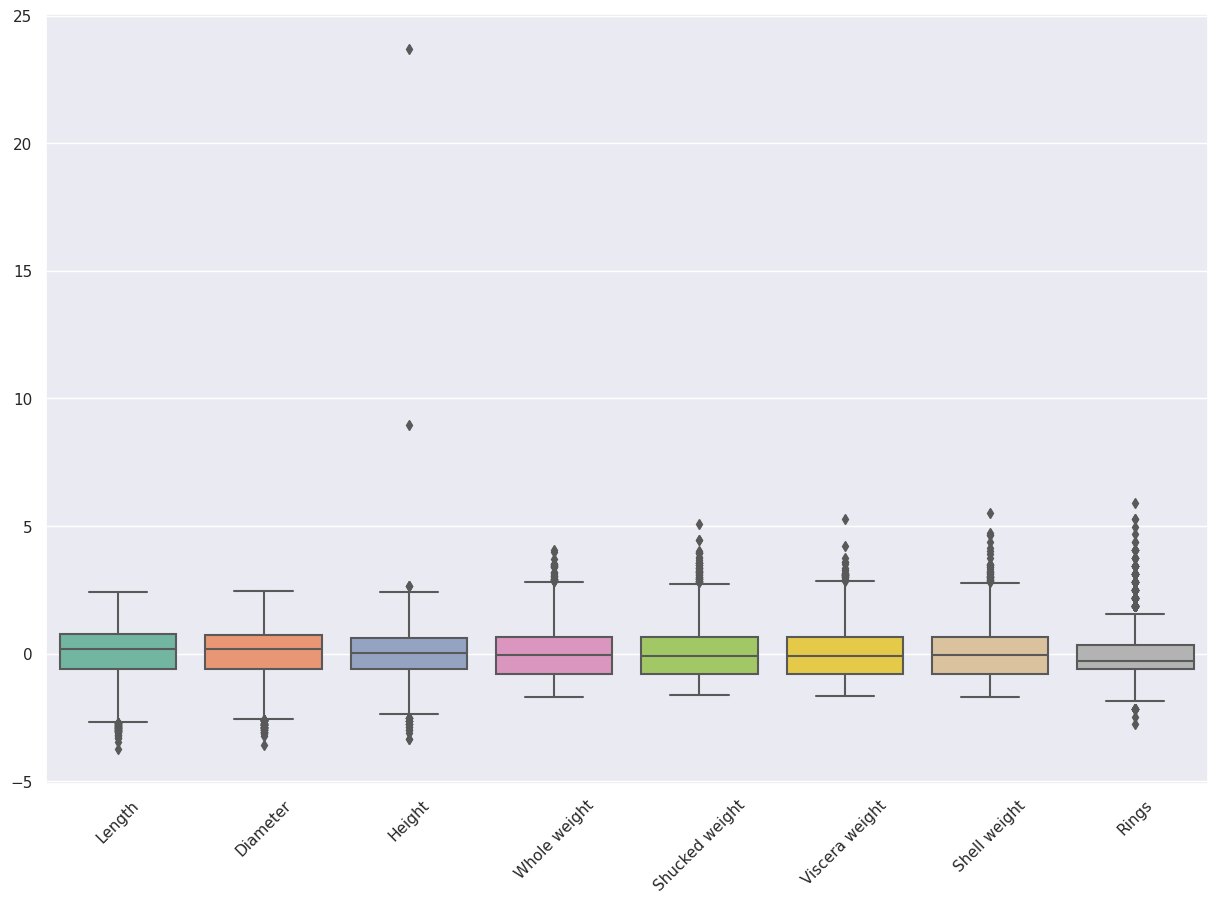

In [19]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


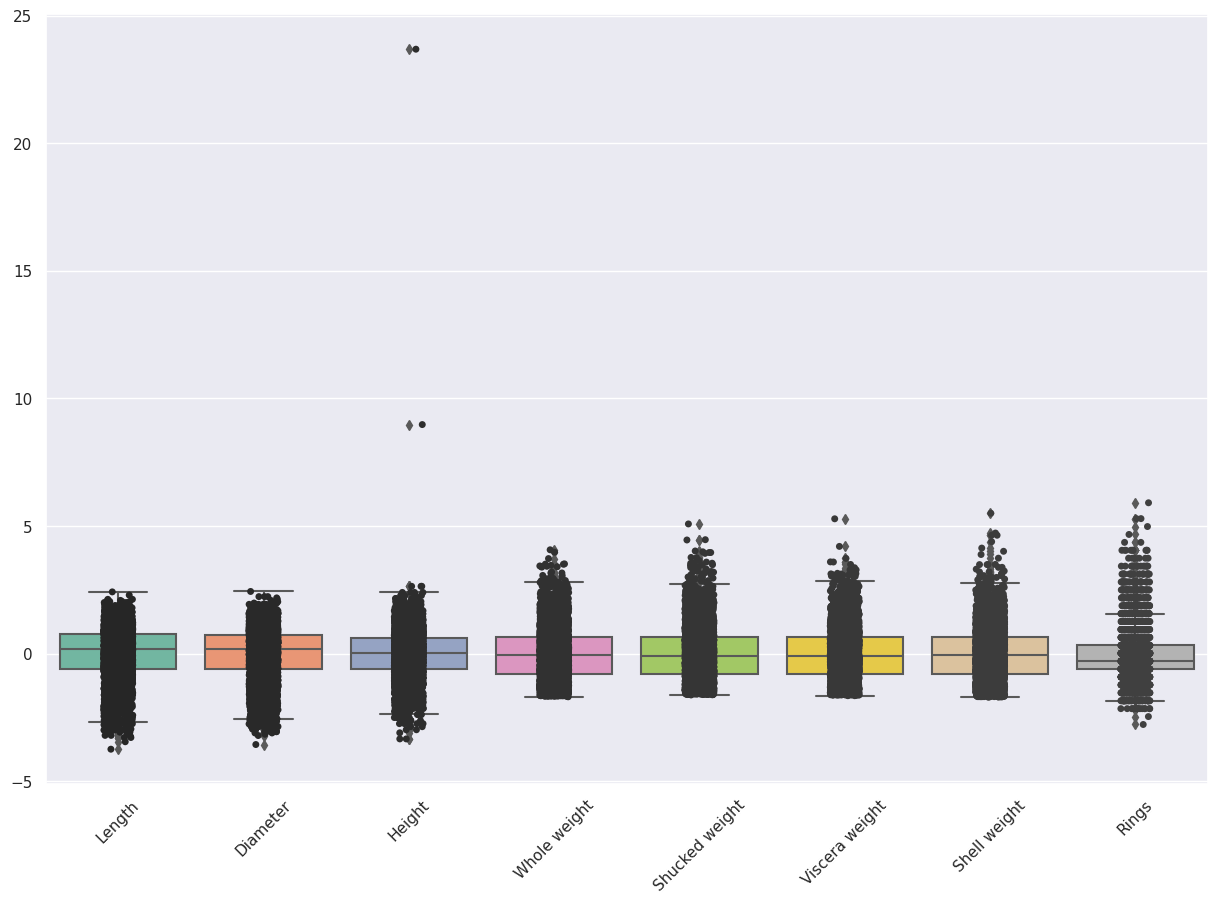

In [20]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

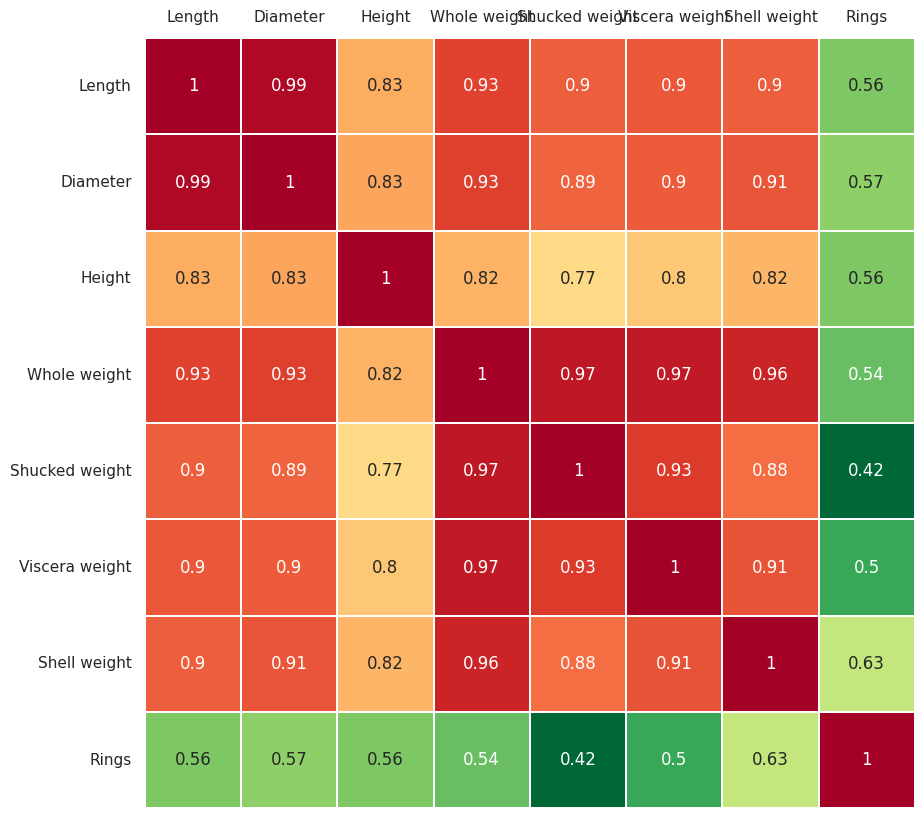

In [21]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

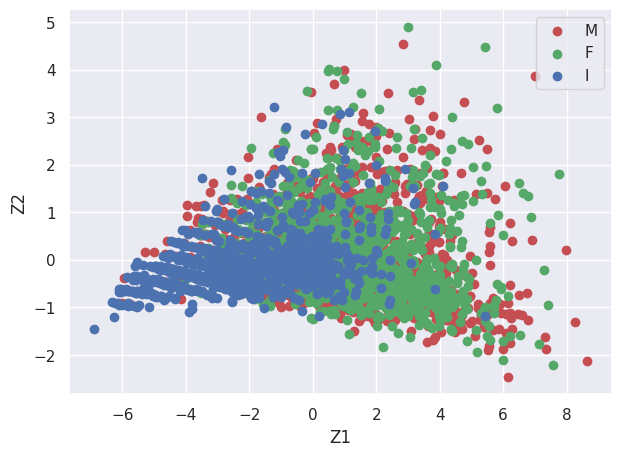

In [22]:
pca = PCA()
Z = pca.fit_transform(X)


idx_4 = np.where(y == 'M')
idx_5 = np.where(y == 'F')
idx_6 = np.where(y == 'I')


plt. figure()
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='M')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='F')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='I')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[ 3.72138505e-01, -6.82826958e-02,  3.10703159e-02,
        -6.04053517e-01, -1.11248478e-02, -4.74968278e-02,
        -6.98825733e-01, -1.63485531e-02],
       [ 3.73094111e-01, -4.00480412e-02,  4.10050673e-02,
        -5.87594701e-01,  5.79110156e-02, -2.33754046e-02,
         7.12985166e-01,  2.19254893e-04],
       [ 3.40026777e-01,  7.04631477e-02,  8.99705624e-01,
         2.56777039e-01, -5.67292650e-02,  2.66914622e-02,
        -8.61445194e-03, -2.68817140e-03],
       [ 3.78307478e-01, -1.37346192e-01, -2.06193609e-01,
         2.41848954e-01,  1.56556128e-02,  1.17255046e-01,
         8.33128844e-03, -8.50264371e-01],
       [ 3.62454487e-01, -2.98839921e-01, -2.08286301e-01,
         1.83245659e-01, -3.98525300e-01,  6.24892864e-01,
         9.28176619e-03,  3.91100542e-01],
       [ 3.68557801e-01, -1.72978517e-01, -1.97379538e-01,
         2.65220563e-01, -3.09821489e-01, -7.65843810e-01,
         2.73455394e-02,  2.04179031e-01],
       [ 3.70757823e-01,  4.540040

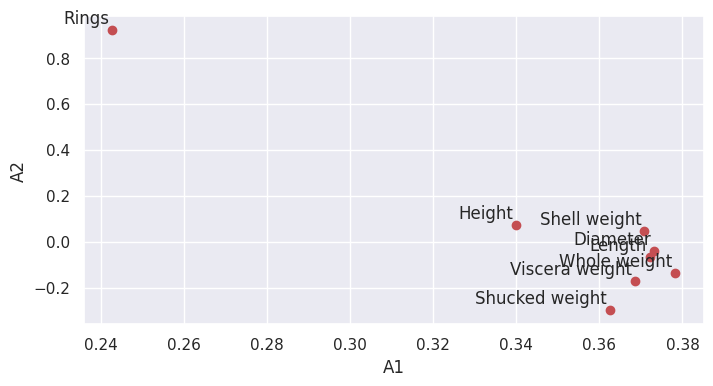

In [23]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


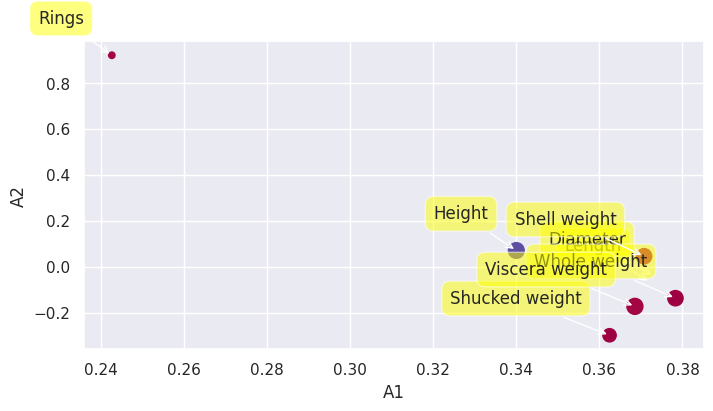

In [24]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Explained variance by number of components:
Component 1: 83.91%
Component 2: 8.70%
Component 3: 3.23%
Component 4: 2.07%
Component 5: 1.06%
Component 6: 0.79%
Component 7: 0.16%
Component 8: 0.08%


array([6.71404654e+00, 6.95779541e-01, 2.58505008e-01, 1.66029591e-01,
       8.49700060e-02, 6.34879663e-02, 1.26972036e-02, 6.39985662e-03])

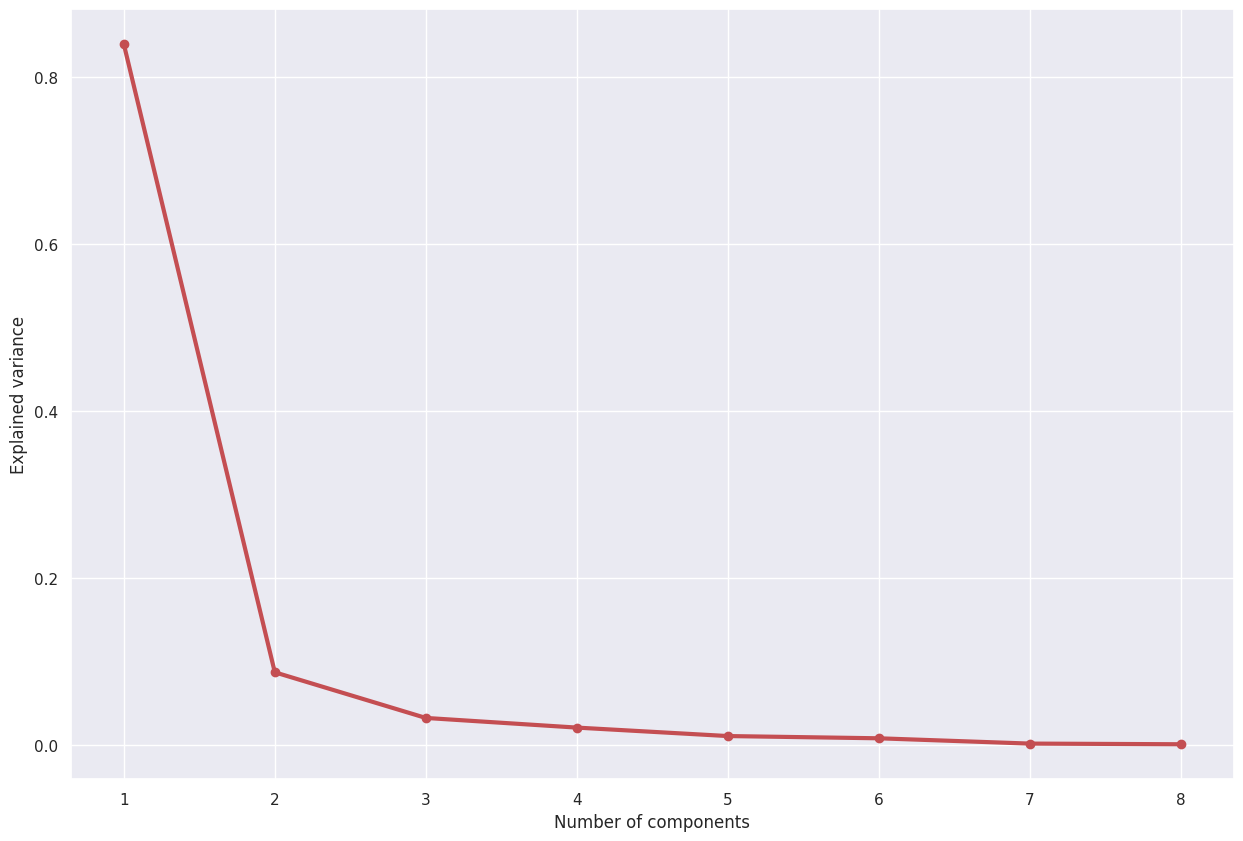

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_ 

explained_var = Lambda / sum(Lambda)
print("Explained variance by number of components:")
for i, var in enumerate(explained_var):
    print("Component {}: {:.2%}".format(i+1, var))

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

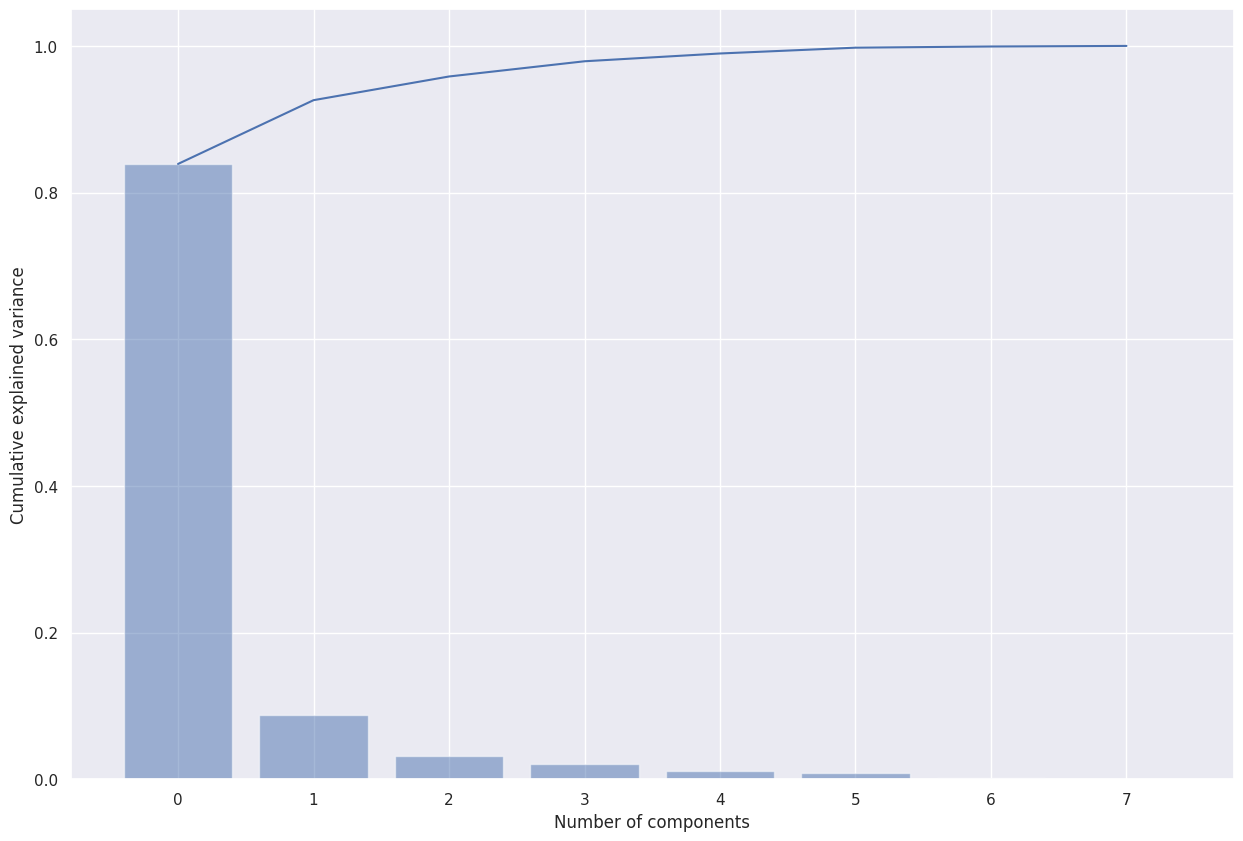

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Bi plot**

array([ 1.79565502, -0.09283156, -0.04940728, ..., -0.69391768,
       -0.46575061, -0.80973552])

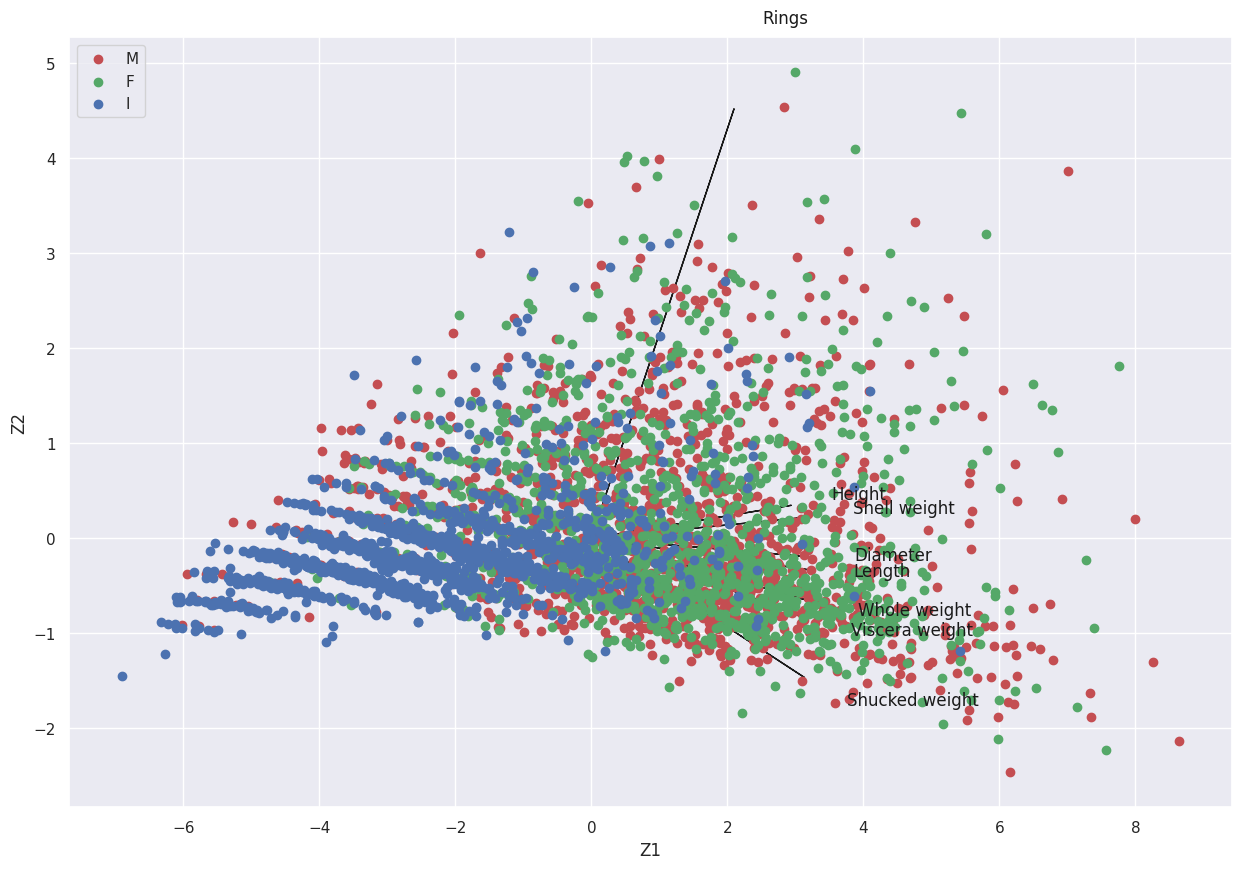

In [28]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='M')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='F')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='I')

plt.legend(loc='upper left')
Z1
Z2

## **Using PCA Library**

In [29]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [31]:
out['PC']

PC1       PC2       PC3
0    -1.322914  1.795655 -0.789816
1    -3.483651 -0.092832 -0.063011
2    -0.536161 -0.049407  0.229275
3    -1.458054  0.418640  0.128083
4    -3.766906 -0.065752 -0.235819
...        ...       ...       ...
4172  0.858730  0.187821  0.361217
4173  0.701295 -0.231276 -0.289431
4174  2.033016 -0.693918  0.937017
4175  1.601240 -0.465751 -0.204418
4176  4.898617 -0.809736 -0.491772

[4177 rows x 3 columns]

**Scatter Plot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.90%] of the variance'}, xlabel='PC1 (83.9% expl.var)', ylabel='PC2 (8.69% expl.var)'>)

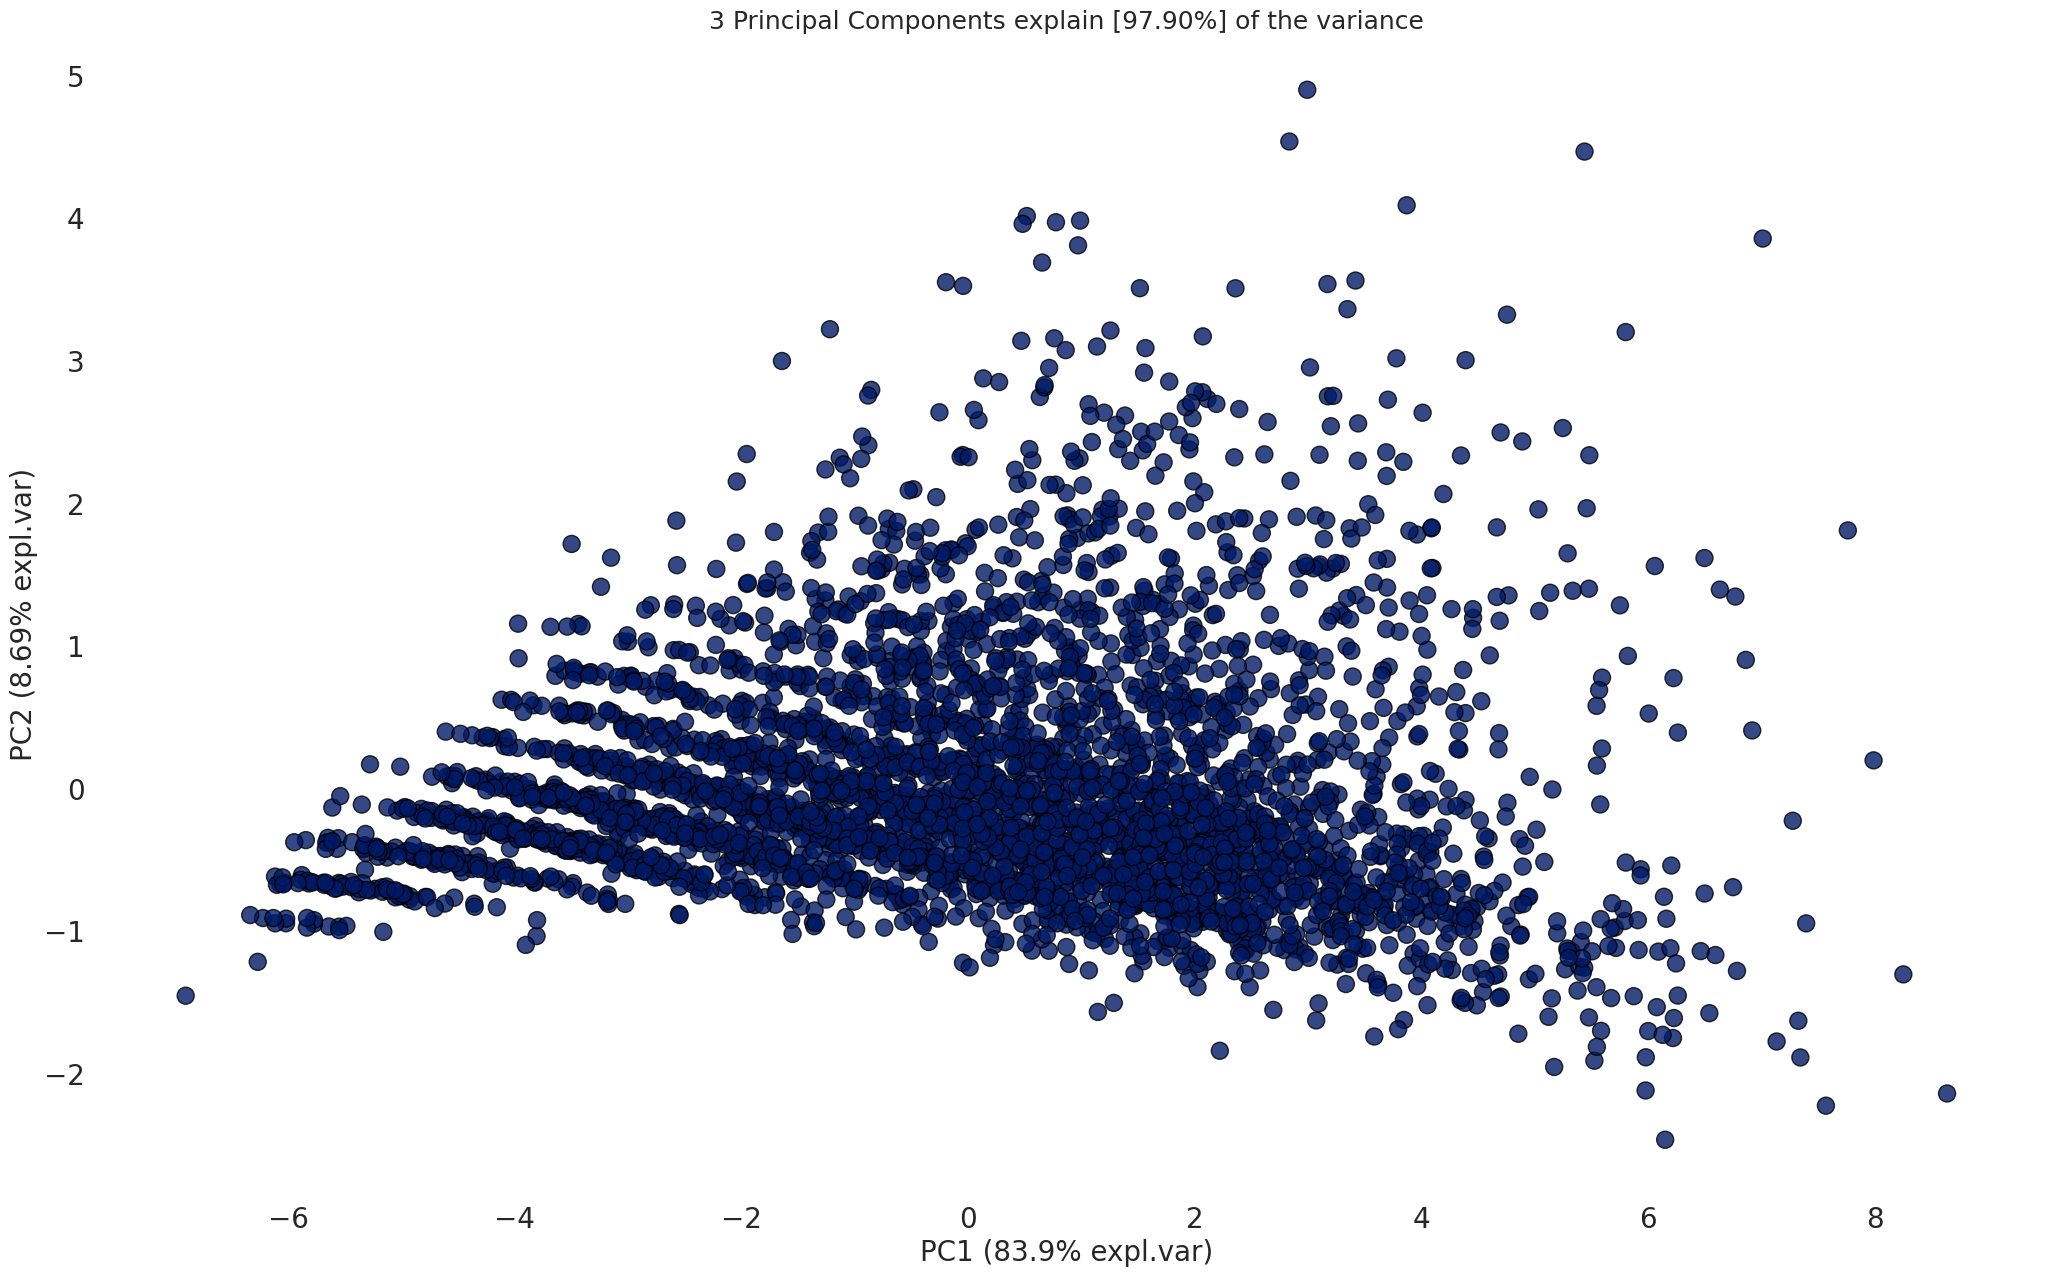

In [32]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [33]:
A = out['loadings'].T
A

PC1       PC2       PC3
Length          0.372139 -0.068283  0.031070
Diameter        0.373094 -0.040048  0.041005
Height          0.340027  0.070463  0.899706
Whole weight    0.378307 -0.137346 -0.206194
Shucked weight  0.362454 -0.298840 -0.208286
Viscera weight  0.368558 -0.172979 -0.197380
Shell weight    0.370758  0.045400 -0.161574
Rings           0.242713  0.921204 -0.192144

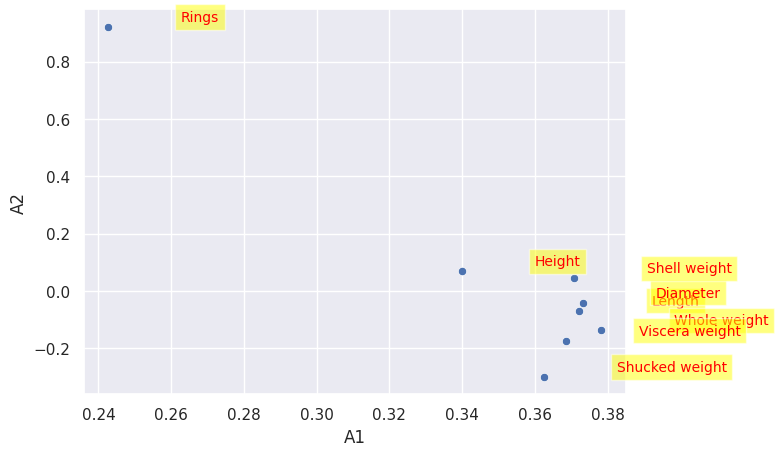

In [34]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

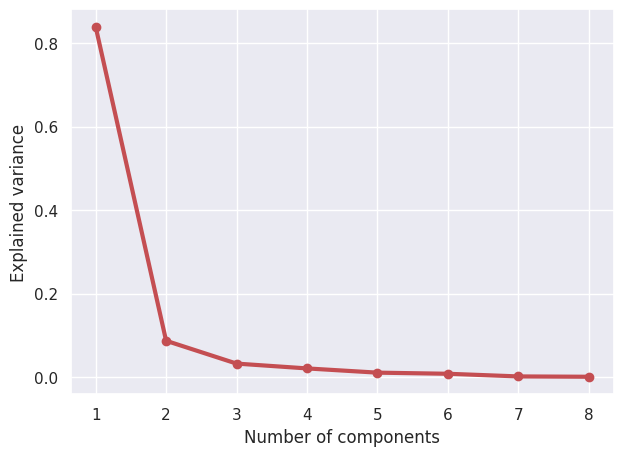

In [35]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

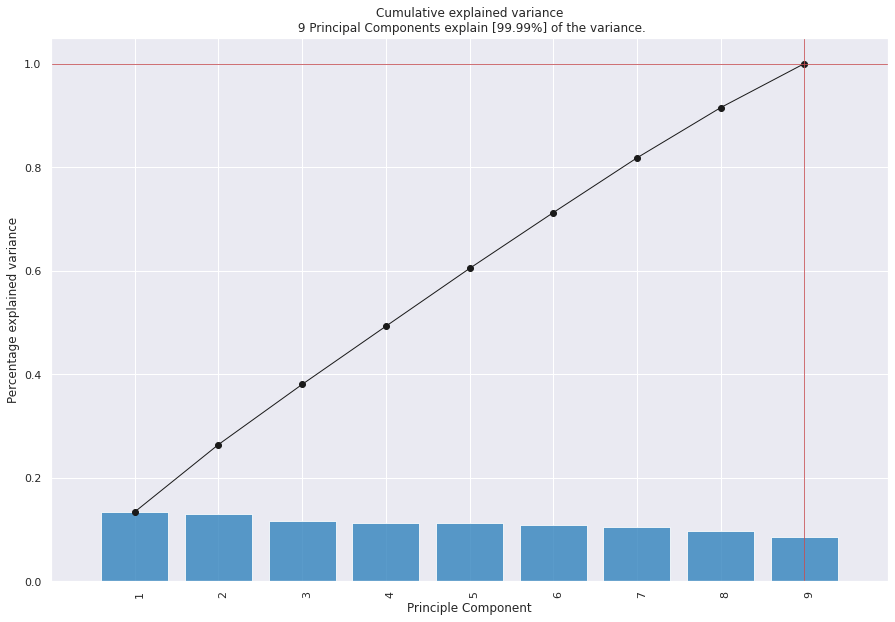

<Figure size 504x360 with 0 Axes>

In [ ]:

model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

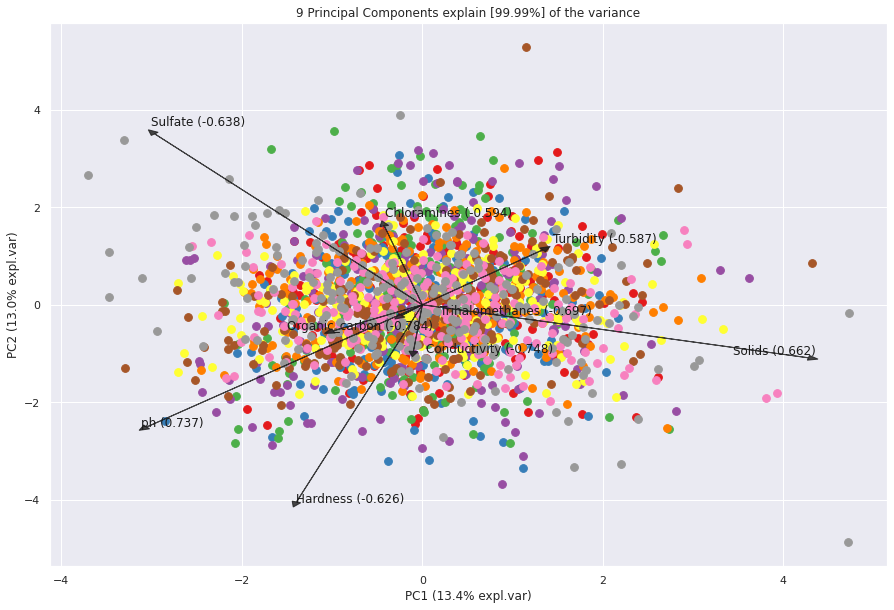

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1080x720 with 1 Axes>,
 <Axes3D: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)', zlabel='PC3 (11.6% expl.var)'>)

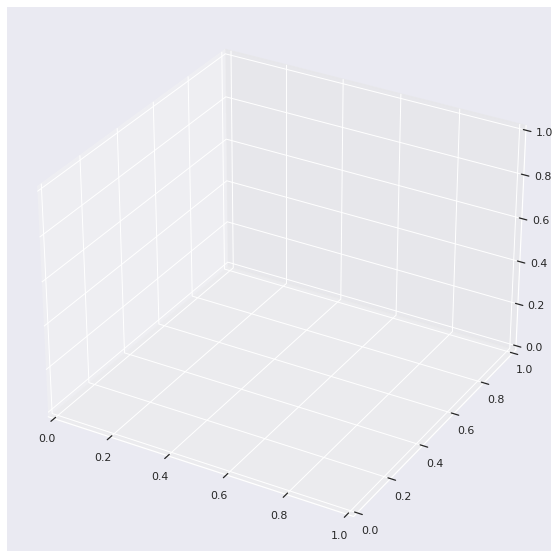

In [ ]:
model.biplot3d(legend=False)